In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/insurance (1).csv")  #importing file
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#analysing of data

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.duplicated().sum() #any duplicate value or not

1

In [ ]:
data.loc[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [ ]:
data.isnull().sum() #any null values is there or not

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**describing each column of dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



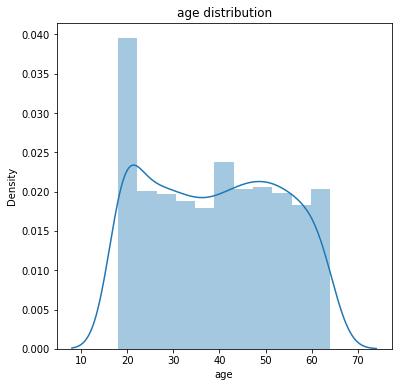

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title("age distribution")
plt.show()

Text(0.5, 1.0, 'sex distribution')

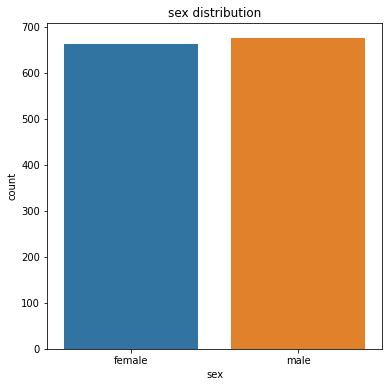

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title('sex distribution')

In [ ]:
data['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



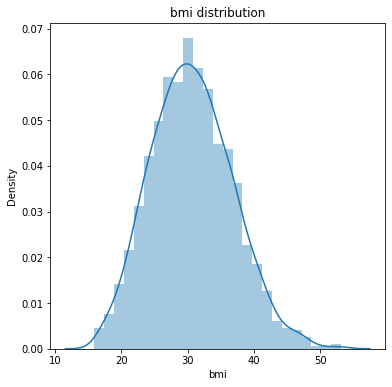

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title("bmi distribution")
plt.show()

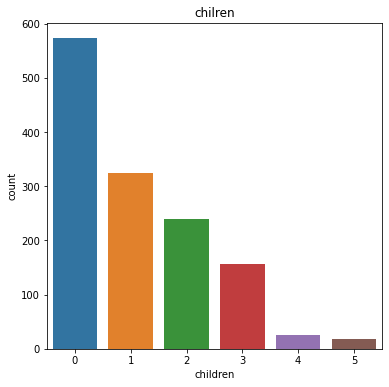

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title('children')
plt.show()

In [ ]:
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Figure size 432x432 with 0 Axes>

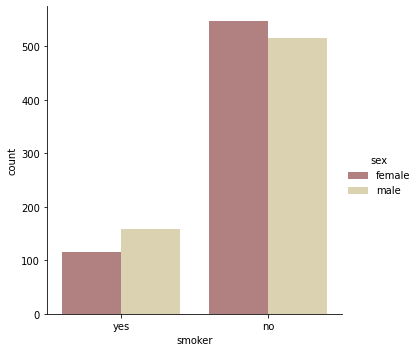

In [ ]:
plt.figure(figsize=(6,6))
sns.catplot(x='smoker', kind='count', hue='sex', palette='pink', data=data)

In [ ]:
data['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

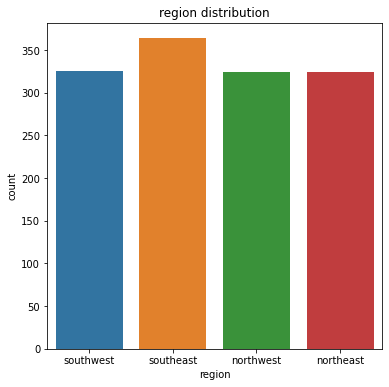

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=data)
plt.title('region distribution')
plt.show()

In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



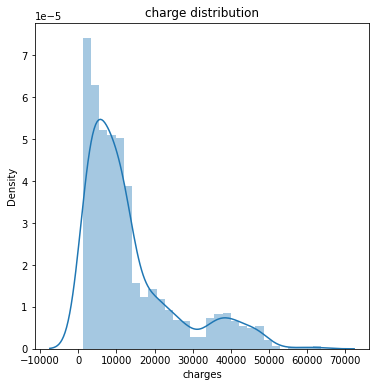

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title("charge distribution")
plt.show()

In [ ]:
data.max()

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

In [ ]:
data.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object

**relation of charges with age**

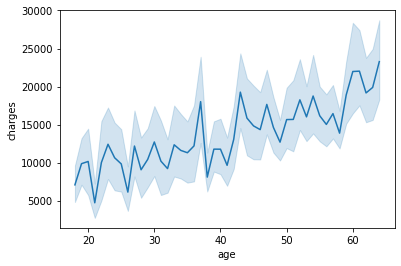

In [ ]:
sns.lineplot(x="age",y="charges",data=data)

**relation of charges with smoker**

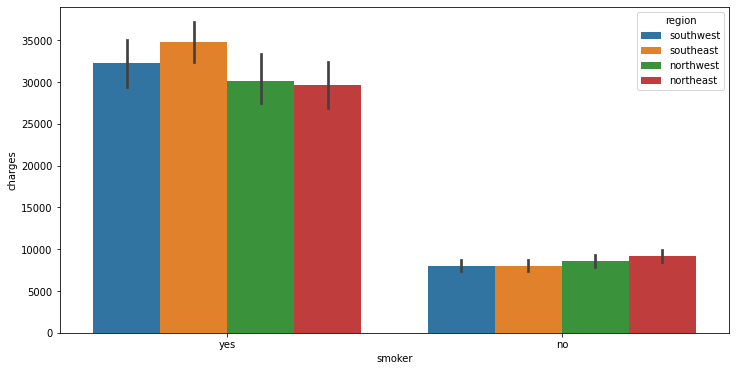

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="smoker",y="charges",hue="region",data=data)

**there might be vary in charges with different charges**

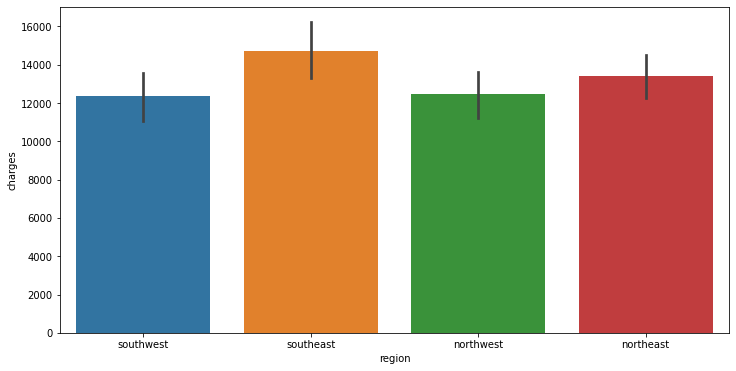

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="region",y="charges",data=data)

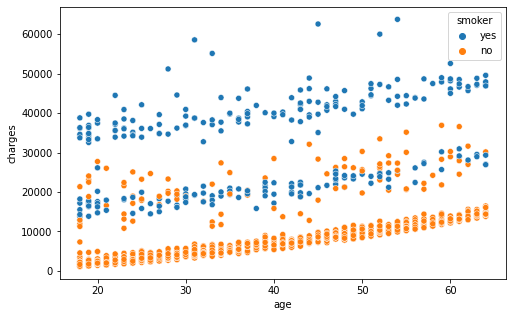

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x="age",y="charges",hue="smoker")

#for the range of charges we have use boxplot 

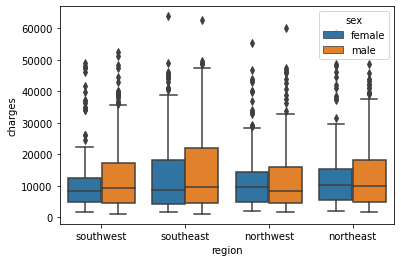

In [ ]:
sns.boxplot(x="region",y ="charges",hue ="sex",data = data)

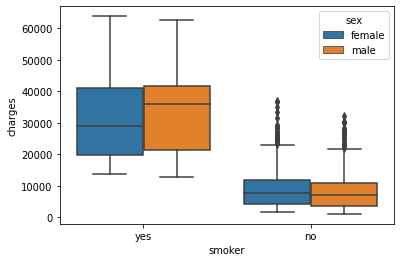

In [ ]:
sns.boxplot(x="smoker",y ="charges",hue ="sex",data = data)

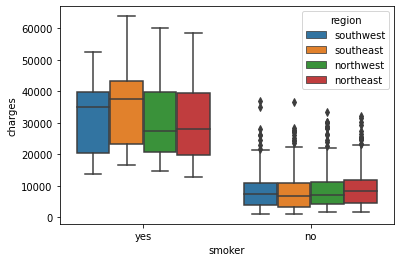

In [ ]:
sns.boxplot(x="smoker",y ="charges",hue ="region",data = data)

#conclusion
**1.Average Charges of females are lesser than the man**

**2.South East region has more charges as compared with another region**

**3.Smoker have higher charges than non smoker.non smoker charges mostly ranges between 0-20K,while smoker charges are starts from 15K and goes upto 60K.**

**4.aged people have slightly higher charges than young ones**

